In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np

In [61]:
train_df = pd.read_csv('../../results/data/ml/train_data.csv', index_col=0)
test_df = pd.read_csv('../../results/data/ml/test_data.csv', index_col=0)
val1_df = pd.read_csv('../../results/data/ml/test_data_GD2.csv', index_col=0)
val2_df = pd.read_csv('../../results/data/ml/test_data_SH.csv', index_col=0)

In [62]:
train_df.group.value_counts()

group
HCC    226
LC     104
CHB    102
HC      70
Name: count, dtype: int64

In [63]:
# HCC vs Control (HC + CHB + LC)

train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)
val1_data = TabularDataset(val1_df)
val2_data = TabularDataset(val2_df)

train_data[["group"]] = train_data[["group"]] == "HCC"
test_data[["group"]] = test_data[["group"]] == "HCC"
val1_data[["group"]] = val1_data[["group"]] == "HCC"
val2_data[["group"]] = val2_data[["group"]] == "HCC"

In [77]:
global_predictor = TabularPredictor('group', eval_metric='roc_auc').fit(train_data, time_limit=300, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20241224_080856"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.8
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.1.0: Thu Oct 10 21:02:26 PDT 2024; root:xnu-11215.41.3~2/RELEASE_ARM64_T8122
CPU Count:          8
Memory Avail:       4.79 GB / 16.00 GB (29.9%)
Disk Space Avail:   16.02 GB / 460.43 GB (3.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_sta

In [78]:
global_predictor.evaluate(test_data)

{'roc_auc': 0.8665757859759734,
 'accuracy': 0.7935779816513762,
 'balanced_accuracy': 0.7884893925193832,
 'mcc': 0.5805761764934408,
 'f1': 0.7619047619047619,
 'precision': 0.782608695652174,
 'recall': 0.7422680412371134}

In [79]:
global_predictor.evaluate(val1_data)

{'roc_auc': 0.8122685185185186,
 'accuracy': 0.7365591397849462,
 'balanced_accuracy': 0.7375,
 'mcc': 0.4751925359817335,
 'f1': 0.7351351351351352,
 'precision': 0.7640449438202247,
 'recall': 0.7083333333333334}

In [80]:
global_predictor.evaluate(val2_data)

{'roc_auc': 0.8414125904803684,
 'accuracy': 0.7777777777777778,
 'balanced_accuracy': 0.7802149594209257,
 'mcc': 0.5343436339759967,
 'f1': 0.6981132075471698,
 'precision': 0.6271186440677966,
 'recall': 0.7872340425531915}

In [64]:
HCC_HC_train_df = train_df[np.isin(train_df.group, ['HCC', 'HC'])]
HCC_HC_test_df = test_df[np.isin(test_df.group, ['HCC', 'HC'])]
HCC_HC_val1_df = val1_df[np.isin(val1_df.group, ['HCC', 'HC'])]
HCC_HC_val2_df = val2_df[np.isin(val2_df.group, ['HCC', 'HC'])]

HCC_HC_train_data = TabularDataset(HCC_HC_train_df)
HCC_HC_test_data = TabularDataset(HCC_HC_test_df)
HCC_HC_val1_data = TabularDataset(HCC_HC_val1_df)
HCC_HC_val2_data = TabularDataset(HCC_HC_val2_df)

HCC_HC_train_data['group'] = HCC_HC_train_data['group'] == 'HCC'
HCC_HC_test_data['group'] = HCC_HC_test_data['group'] == 'HCC'
HCC_HC_val1_data['group'] = HCC_HC_val1_data['group'] == 'HCC'
HCC_HC_val2_data['group'] = HCC_HC_val2_data['group'] == 'HCC'

In [9]:
HCC_HC_predictor = TabularPredictor('group', eval_metric='roc_auc').fit(HCC_HC_train_data, time_limit=300, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20241224_070431"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.8
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.1.0: Thu Oct 10 21:02:26 PDT 2024; root:xnu-11215.41.3~2/RELEASE_ARM64_T8122
CPU Count:          8
Memory Avail:       5.06 GB / 16.00 GB (31.6%)
Disk Space Avail:   16.69 GB / 460.43 GB (3.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_sta

(_ray_fit pid=49732) [1000]	valid_set's binary_logloss: 0.140596


(_dystack pid=49488) 	0.9108	 = Validation score   (roc_auc)
(_dystack pid=49488) 	0.45s	 = Training   runtime
(_dystack pid=49488) 	0.01s	 = Validation runtime
(_dystack pid=49488) Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 10.38s of the 34.26s of remaining time.
(_dystack pid=49488) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.01%)
(raylet) [2024-12-24 15:05:14,016 E 49484 14841702] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-12-24_15-04-31_864067_49406 is over 95% full, available space: 17891864576; capacity: 494384795648. Object creation will fail if spilling is required.
(_ray_fit pid=49753) No improvement since epoch 2: early stopping
(_dystack pid=49488) 	0.9289	 = Validation score   (roc_auc)
(_dystack pid=49488) 	4.02s	 = Training   runtime
(_dystack pid=49488) 	0.05s	 = Validation runtime
(_dystack pid=49488) Fitting model: CatBoost_r9_BAG_L1 ... Trai

In [58]:
HCC_HC_predictor.evaluate(HCC_HC_test_data)

{'roc_auc': 0.9334885267708679,
 'accuracy': 0.84375,
 'balanced_accuracy': 0.7871632856667775,
 'mcc': 0.574326571333555,
 'f1': 0.8969072164948454,
 'precision': 0.8969072164948454,
 'recall': 0.8969072164948454}

In [65]:
HCC_HC_predictor.evaluate(HCC_HC_val1_data)

{'roc_auc': 0.8996527777777779,
 'accuracy': 0.8253968253968254,
 'balanced_accuracy': 0.8052083333333333,
 'mcc': 0.5664864059146737,
 'f1': 0.8804347826086957,
 'precision': 0.9204545454545454,
 'recall': 0.84375}

In [66]:
HCC_HC_predictor.evaluate(HCC_HC_val2_data)

{'roc_auc': 0.9157119476268413,
 'accuracy': 0.8493150684931506,
 'balanced_accuracy': 0.8228314238952537,
 'mcc': 0.665568071785109,
 'f1': 0.8865979381443299,
 'precision': 0.86,
 'recall': 0.9148936170212766}

In [67]:
HCC_CHB_train_df = train_df[np.isin(train_df.group, ['HCC', 'CHB'])]
HCC_CHB_test_df = test_df[np.isin(test_df.group, ['HCC', 'CHB'])]
HCC_CHB_val1_df = val1_df[np.isin(val1_df.group, ['HCC', 'CHB'])]
HCC_CHB_val2_df = val2_df[np.isin(val2_df.group, ['HCC', 'CHB'])]

HCC_CHB_train_data = TabularDataset(HCC_CHB_train_df)
HCC_CHB_test_data = TabularDataset(HCC_CHB_test_df)
HCC_CHB_val1_data = TabularDataset(HCC_CHB_val1_df)
HCC_CHB_val2_data = TabularDataset(HCC_CHB_val2_df)

HCC_CHB_train_data['group'] = HCC_CHB_train_data['group'] == 'HCC'
HCC_CHB_test_data['group'] = HCC_CHB_test_data['group'] == 'HCC'
HCC_CHB_val1_data['group'] = HCC_CHB_val1_data['group'] == 'HCC'
HCC_CHB_val2_data['group'] = HCC_CHB_val2_data['group'] == 'HCC'

In [68]:
HCC_CHB_predictor = TabularPredictor('group', eval_metric='roc_auc').fit(HCC_CHB_train_data, time_limit=300, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20241224_075615"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.8
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.1.0: Thu Oct 10 21:02:26 PDT 2024; root:xnu-11215.41.3~2/RELEASE_ARM64_T8122
CPU Count:          8
Memory Avail:       4.95 GB / 16.00 GB (30.9%)
Disk Space Avail:   16.40 GB / 460.43 GB (3.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_sta

In [69]:
HCC_CHB_predictor.evaluate(HCC_CHB_test_data)

{'roc_auc': 0.8969072164948453,
 'accuracy': 0.8661971830985915,
 'balanced_accuracy': 0.8603665521191295,
 'mcc': 0.7020817408643542,
 'f1': 0.8994708994708994,
 'precision': 0.9239130434782609,
 'recall': 0.8762886597938144}

In [70]:
HCC_CHB_predictor.evaluate(HCC_CHB_val1_data)

{'roc_auc': 0.8562500000000003,
 'accuracy': 0.7857142857142857,
 'balanced_accuracy': 0.7791666666666667,
 'mcc': 0.5015526467271991,
 'f1': 0.8491620111731844,
 'precision': 0.9156626506024096,
 'recall': 0.7916666666666666}

In [71]:
HCC_CHB_predictor.evaluate(HCC_CHB_val2_data)

{'roc_auc': 0.8244680851063829,
 'accuracy': 0.7469879518072289,
 'balanced_accuracy': 0.734338061465721,
 'mcc': 0.48016498759598053,
 'f1': 0.7878787878787878,
 'precision': 0.75,
 'recall': 0.8297872340425532}

In [72]:
HCC_LC_train_df = train_df[np.isin(train_df.group, ['HCC', 'LC'])]
HCC_LC_test_df = test_df[np.isin(test_df.group, ['HCC', 'LC'])]
HCC_LC_val1_df = val1_df[np.isin(val1_df.group, ['HCC', 'LC'])]
HCC_LC_val2_df = val2_df[np.isin(val2_df.group, ['HCC', 'LC'])]

HCC_LC_train_data = TabularDataset(HCC_LC_train_df)
HCC_LC_test_data = TabularDataset(HCC_LC_test_df)
HCC_LC_val1_data = TabularDataset(HCC_LC_val1_df)
HCC_LC_val2_data = TabularDataset(HCC_LC_val2_df)

HCC_LC_train_data['group'] = HCC_LC_train_data['group'] == 'HCC'
HCC_LC_test_data['group'] = HCC_LC_test_data['group'] == 'HCC'
HCC_LC_val1_data['group'] = HCC_LC_val1_data['group'] == 'HCC'
HCC_LC_val2_data['group'] = HCC_LC_val2_data['group'] == 'HCC'

In [73]:
HCC_LC_predictor = TabularPredictor('group', eval_metric='roc_auc').fit(HCC_LC_train_data, time_limit=300, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20241224_080224"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.8
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.1.0: Thu Oct 10 21:02:26 PDT 2024; root:xnu-11215.41.3~2/RELEASE_ARM64_T8122
CPU Count:          8
Memory Avail:       5.22 GB / 16.00 GB (32.6%)
Disk Space Avail:   16.20 GB / 460.43 GB (3.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_sta

In [74]:
HCC_LC_predictor.evaluate(HCC_LC_test_data)

{'roc_auc': 0.838717067583047,
 'accuracy': 0.7746478873239436,
 'balanced_accuracy': 0.6742268041237114,
 'mcc': 0.44004763507398714,
 'f1': 0.8518518518518519,
 'precision': 0.773109243697479,
 'recall': 0.9484536082474226}

In [75]:
HCC_LC_predictor.evaluate(HCC_LC_val1_data)

{'roc_auc': 0.75625,
 'accuracy': 0.7619047619047619,
 'balanced_accuracy': 0.6604166666666667,
 'mcc': 0.3286878675669583,
 'f1': 0.845360824742268,
 'precision': 0.8367346938775511,
 'recall': 0.8541666666666666}

In [76]:
HCC_LC_predictor.evaluate(HCC_HC_val2_data)

{'roc_auc': 0.8355155482815056,
 'accuracy': 0.7808219178082192,
 'balanced_accuracy': 0.7266775777414075,
 'mcc': 0.5036821550047027,
 'f1': 0.8431372549019608,
 'precision': 0.7818181818181819,
 'recall': 0.9148936170212766}

In [81]:
global_predictor.predict(test_data)

sample
S2      False
S3      False
S4       True
S7      False
S8      False
        ...  
S720     True
S724     True
S728    False
S731     True
S738    False
Name: group, Length: 218, dtype: bool

In [83]:
global_predictor.predict_proba(test_data)

,False,True
sample,,
S2,0.884017,0.115983
S3,0.800615,0.199385
S4,0.265057,0.734943
S7,0.800653,0.199347
S8,0.874317,0.125683
...,...,...
S720,0.154570,0.845430
S724,0.231386,0.768614
S728,0.850449,0.149551


In [87]:
global_preds_test = pd.DataFrame({
    'sample': test_data.index,
    'true': test_data.group,
    'pred': global_predictor.predict(test_data),
    'proba': global_predictor.predict_proba(test_data).iloc[:,1],
    'model': ['global'] * len(test_data.index),
    'dataset': ['test'] * len(test_data.index),
})
global_preds_val1 = pd.DataFrame({
    'sample': val1_data.index,
    'true': val1_data.group,
    'pred': global_predictor.predict(val1_data),
    'proba': global_predictor.predict_proba(val1_data).iloc[:,1],
    'model': ['global'] * len(val1_data.index),
    'dataset': ['val1'] * len(val1_data.index),
})
global_preds_val2 = pd.DataFrame({
    'sample': val2_data.index,
    'true': val2_data.group,
    'pred': global_predictor.predict(val2_data),
    'proba': global_predictor.predict_proba(val2_data).iloc[:,1],
    'model': ['global'] * len(val2_data.index),
    'dataset': ['val2'] * len(val2_data.index),
})

HCC_HC_preds_test = pd.DataFrame({
    'sample': HCC_HC_test_data.index,
    'true': HCC_HC_test_data.group,
    'pred': HCC_HC_predictor.predict(HCC_HC_test_data),
    'proba': HCC_HC_predictor.predict_proba(HCC_HC_test_data).iloc[:,1],
    'model': ['HCC_HC'] * len(HCC_HC_test_data.index),
    'dataset': ['test'] * len(HCC_HC_test_data.index),
})
HCC_HC_preds_val1 = pd.DataFrame({
    'sample': HCC_HC_val1_data.index,
    'true': HCC_HC_val1_data.group,
    'pred': HCC_HC_predictor.predict(HCC_HC_val1_data),
    'proba': HCC_HC_predictor.predict_proba(HCC_HC_val1_data).iloc[:,1],
    'model': ['HCC_HC'] * len(HCC_HC_val1_data.index),
    'dataset': ['val1'] * len(HCC_HC_val1_data.index),
})
HCC_HC_preds_val2 = pd.DataFrame({
    'sample': HCC_HC_val2_data.index,
    'true': HCC_HC_val2_data.group,
    'pred': HCC_HC_predictor.predict(HCC_HC_val2_data),
    'proba': HCC_HC_predictor.predict_proba(HCC_HC_val2_data).iloc[:,1],
    'model': ['HCC_HC'] * len(HCC_HC_val2_data.index),
    'dataset': ['val2'] * len(HCC_HC_val2_data.index),
})

HCC_CHB_preds_test = pd.DataFrame({
    'sample': HCC_CHB_test_data.index,
    'true': HCC_CHB_test_data.group,
    'pred': HCC_CHB_predictor.predict(HCC_CHB_test_data),
    'proba': HCC_CHB_predictor.predict_proba(HCC_CHB_test_data).iloc[:,1],
    'model': ['HCC_CHB'] * len(HCC_CHB_test_data.index),
    'dataset': ['test'] * len(HCC_CHB_test_data.index),
})
HCC_CHB_preds_val1 = pd.DataFrame({
    'sample': HCC_CHB_val1_data.index,
    'true': HCC_CHB_val1_data.group,
    'pred': HCC_CHB_predictor.predict(HCC_CHB_val1_data),
    'proba': HCC_CHB_predictor.predict_proba(HCC_CHB_val1_data).iloc[:,1],
    'model': ['HCC_CHB'] * len(HCC_CHB_val1_data.index),
    'dataset': ['val1'] * len(HCC_CHB_val1_data.index),
})
HCC_CHB_preds_val2 = pd.DataFrame({
    'sample': HCC_CHB_val2_data.index,
    'true': HCC_CHB_val2_data.group,
    'pred': HCC_CHB_predictor.predict(HCC_CHB_val2_data),
    'proba': HCC_CHB_predictor.predict_proba(HCC_CHB_val2_data).iloc[:,1],
    'model': ['HCC_CHB'] * len(HCC_CHB_val2_data.index),
    'dataset': ['val2'] * len(HCC_CHB_val2_data.index),
})

HCC_LC_preds_test = pd.DataFrame({
    'sample': HCC_LC_test_data.index,
    'true': HCC_LC_test_data.group,
    'pred': HCC_LC_predictor.predict(HCC_LC_test_data),
    'proba': HCC_LC_predictor.predict_proba(HCC_LC_test_data).iloc[:,1],
    'model': ['HCC_LC'] * len(HCC_LC_test_data.index),
    'dataset': ['test'] * len(HCC_LC_test_data.index),
})
HCC_LC_preds_val1 = pd.DataFrame({
    'sample': HCC_LC_val1_data.index,
    'true': HCC_LC_val1_data.group,
    'pred': HCC_LC_predictor.predict(HCC_LC_val1_data),
    'proba': HCC_LC_predictor.predict_proba(HCC_LC_val1_data).iloc[:,1],
    'model': ['HCC_LC'] * len(HCC_LC_val1_data.index),
    'dataset': ['val1'] * len(HCC_LC_val1_data.index),
})
HCC_LC_preds_val2 = pd.DataFrame({
    'sample': HCC_LC_val2_data.index,
    'true': HCC_LC_val2_data.group,
    'pred': HCC_LC_predictor.predict(HCC_LC_val2_data),
    'proba': HCC_LC_predictor.predict_proba(HCC_LC_val2_data).iloc[:,1],
    'model': ['HCC_LC'] * len(HCC_LC_val2_data.index),
    'dataset': ['val2'] * len(HCC_LC_val2_data.index),
})

In [99]:
combined_preds = pd.concat([
    global_preds_test, global_preds_val1, global_preds_val2,
    HCC_HC_preds_test, HCC_HC_preds_val1, HCC_HC_preds_val2,
    HCC_CHB_preds_test, HCC_CHB_preds_val1, HCC_CHB_preds_val2,
    HCC_LC_preds_test, HCC_LC_preds_val1, HCC_LC_preds_val2
]).reset_index(drop = True)

In [100]:
combined_preds

,sample,true,pred,proba,model,dataset
0,S2,False,False,0.115983,global,test
1,S3,True,False,0.199385,global,test
2,S4,True,True,0.734943,global,test
3,S7,False,False,0.199347,global,test
4,S8,False,False,0.125683,global,test
...,...,...,...,...,...,...
1571,S2136,True,True,0.953801,HCC_LC,val2
1572,S2137,True,True,0.733602,HCC_LC,val2
1573,S2138,False,True,0.788943,HCC_LC,val2
1574,S2142,True,True,0.803459,HCC_LC,val2


In [101]:
combined_preds.to_csv('../../results/data/ml/preds.csv', index=False)

In [102]:
class AutogluonWrapper:
    def __init__(self, predictor, feature_names):
        self.ag_model = predictor
        self.feature_names = feature_names
    
    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names)
        return self.ag_model.predict_proba(X, as_multiclass=False)

In [132]:
import shap
import matplotlib.pyplot as plt

In [152]:
X_train_global = train_data.drop(columns='group')
global_med = X_train_global.median()

X_test_global = test_data.drop(columns='group')
global_ag_wrapper = AutogluonWrapper(global_predictor, X_train_global.columns)
global_explainer = shap.KernelExplainer(ag_wrapper.predict_binary_prob, global_med)

In [135]:
global_shap_values = global_explainer.shap_values(X_test_global)

  0%|          | 0/218 [00:00<?, ?it/s]

In [153]:
X_train_HCC_HC = HCC_HC_train_data.drop(columns='group')
HCC_HC_med = X_train_HCC_HC.median()

X_test_HCC_HC = HCC_HC_test_data.drop(columns='group')
HCC_HC_ag_wrapper = AutogluonWrapper(HCC_HC_predictor, X_train_HCC_HC.columns)
HCC_HC_explainer = shap.KernelExplainer(ag_wrapper.predict_binary_prob, HCC_HC_med)

In [154]:
HCC_HC_shap_values = HCC_HC_explainer.shap_values(X_test_HCC_HC)

  0%|          | 0/128 [00:00<?, ?it/s]

In [155]:
X_train_HCC_CHB = HCC_CHB_train_data.drop(columns='group')
HCC_CHB_med = X_train_HCC_CHB.median()

X_test_HCC_CHB = HCC_CHB_test_data.drop(columns='group')
HCC_CHB_ag_wrapper = AutogluonWrapper(HCC_CHB_predictor, X_train_HCC_CHB.columns)
HCC_CHB_explainer = shap.KernelExplainer(ag_wrapper.predict_binary_prob, HCC_CHB_med)

In [156]:
HCC_CHB_shap_values = HCC_CHB_explainer.shap_values(X_test_HCC_CHB)

  0%|          | 0/142 [00:00<?, ?it/s]

In [157]:
X_train_HCC_LC = HCC_LC_train_data.drop(columns='group')
HCC_LC_med = X_train_HCC_LC.median()

X_test_HCC_LC = HCC_LC_test_data.drop(columns='group')
HCC_LC_ag_wrapper = AutogluonWrapper(HCC_LC_predictor, X_train_HCC_LC.columns)
HCC_LC_explainer = shap.KernelExplainer(ag_wrapper.predict_binary_prob, HCC_LC_med)

In [158]:
HCC_LC_shap_values = HCC_LC_explainer.shap_values(X_test_HCC_LC)

  0%|          | 0/142 [00:00<?, ?it/s]

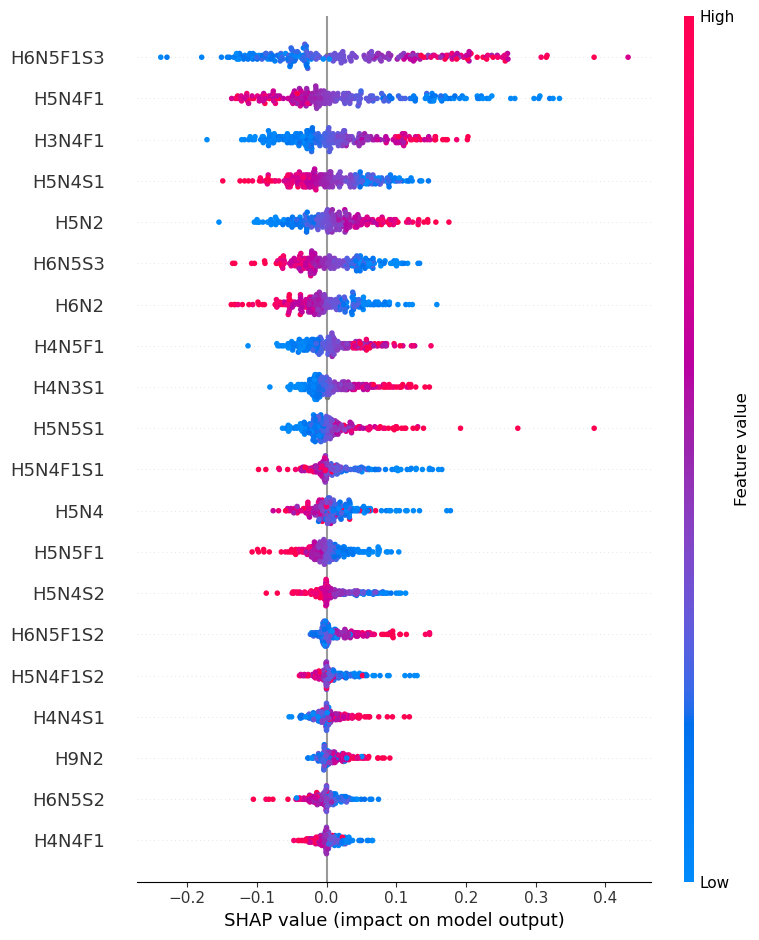

In [172]:
shap.summary_plot(global_shap_values, X_test_global)

In [169]:
matrics = [global_shap_values, HCC_HC_shap_values, HCC_CHB_shap_values, HCC_LC_shap_values]
indices = [X.index for X in [X_test_global, X_test_HCC_HC, X_test_HCC_CHB, X_test_HCC_LC]]
models = ['global', 'HCC_HC', 'HCC_CHB', 'HCC_LC']
shap_dfs = []
for m, idx, mod in zip(matrics, indices, models):
    df = pd.DataFrame(m, columns=X_train_global.columns, index=idx)
    df['model'] = mod
    shap_dfs.append(df)
shap_df = pd.concat(shap_dfs)

In [170]:
shap_df

,H3N4F1,H3N5F1,H4N3S1,H4N4,H4N4S1,H4N4F1,H4N5F1,H5N2,H5N4,H5N4S1,...,H5N5F1S2,H6N2,H6N5S2,H6N5S3,H6N5F1S2,H6N5F1S3,H7N2,H8N2,H9N2,model
sample,,,,,,,,,,,,,,,,,,,,,
S2,-0.012015,-0.007969,-0.019157,-0.000578,-0.022790,0.000000,0.028127,0.027320,-0.029387,0.005302,...,-0.000873,-0.028039,0.021626,0.042905,-0.008579,-0.045956,0.002772,0.000000,-0.002889,global
S3,0.000903,-0.022585,0.003888,0.021338,-0.011268,-0.001517,-0.037492,0.028445,0.100515,0.005258,...,0.000000,-0.011048,0.010575,-0.062953,0.011595,-0.051394,0.006258,0.011608,0.001798,global
S4,0.005957,-0.002678,-0.014418,0.027637,0.003443,0.017918,-0.039537,0.004245,0.032816,-0.112032,...,0.002708,0.037645,0.024372,-0.021229,-0.004863,0.123984,0.008971,-0.039398,0.013824,global
S7,0.003616,-0.004443,-0.008029,0.032497,-0.000975,0.000000,-0.012123,0.030560,0.115632,-0.048541,...,-0.003271,-0.034632,-0.024265,-0.060627,0.001202,-0.096541,0.001613,-0.008370,0.021354,global
S8,-0.025722,-0.021635,-0.011703,-0.003482,-0.016796,0.001921,-0.013969,0.040880,-0.006111,0.005012,...,0.000704,-0.035562,-0.013438,-0.034991,-0.002528,-0.029056,0.002849,0.008672,-0.004603,global
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S705,0.076775,0.001742,-0.017663,0.000983,0.058556,-0.005259,0.057367,0.001618,-0.033982,-0.092196,...,-0.027653,0.015985,-0.010713,0.037050,0.007090,-0.158158,0.003082,0.000000,-0.011659,HCC_LC
S711,-0.119102,-0.043036,-0.024976,0.006193,-0.019114,0.004171,-0.032048,0.024005,-0.012720,0.067398,...,0.018967,-0.045281,0.010886,0.029113,-0.032265,-0.040252,0.014484,0.024546,0.029440,HCC_LC
S714,-0.047010,-0.007993,0.006713,0.004336,0.024771,0.011186,-0.036613,0.042217,-0.014279,-0.132166,...,0.004525,-0.045749,0.007128,0.021879,-0.022887,-0.213045,-0.000460,0.016812,0.011082,HCC_LC


In [171]:
shap_df.to_csv('../../results/data/ml/shap.csv', index=True)